<p align="center">
  <br/>
    <img alt="ScaleDP" src="https://stabrise.com/media/filer_public_thumbnails/filer_public/4a/7d/4a7d97c2-50d7-4b7a-9902-af2df9b574da/scaledplogo.png__1000x300_subsampling-2.webp" width="376" style="max-width: 100%;">
  <br/>
</p>

<p align="center">
    <a target="_blank" href="https://colab.research.google.com/github/StabRise/scaledp-tutorials/blob/master/1.QuickStart.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://pypi.org/project/scaledp/" alt="Package on PyPI"><img src="https://img.shields.io/pypi/v/scaledp.svg" /></a>    
    <a href="https://github.com/stabrise/scaledp/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/scaledp.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=007D8A"></a>
</p>

In [1]:
from scaledp import *

spark = ScaleDPSession()
spark

24/12/02 08:55:08 WARN Utils: Your hostname, nmelnik-1-0 resolves to a loopback address: 127.0.1.1; using 192.168.43.137 instead (on interface wlo1)
24/12/02 08:55:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/02 08:55:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/02 08:55:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/12/02 08:55:09 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/12/02 08:55:09 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.



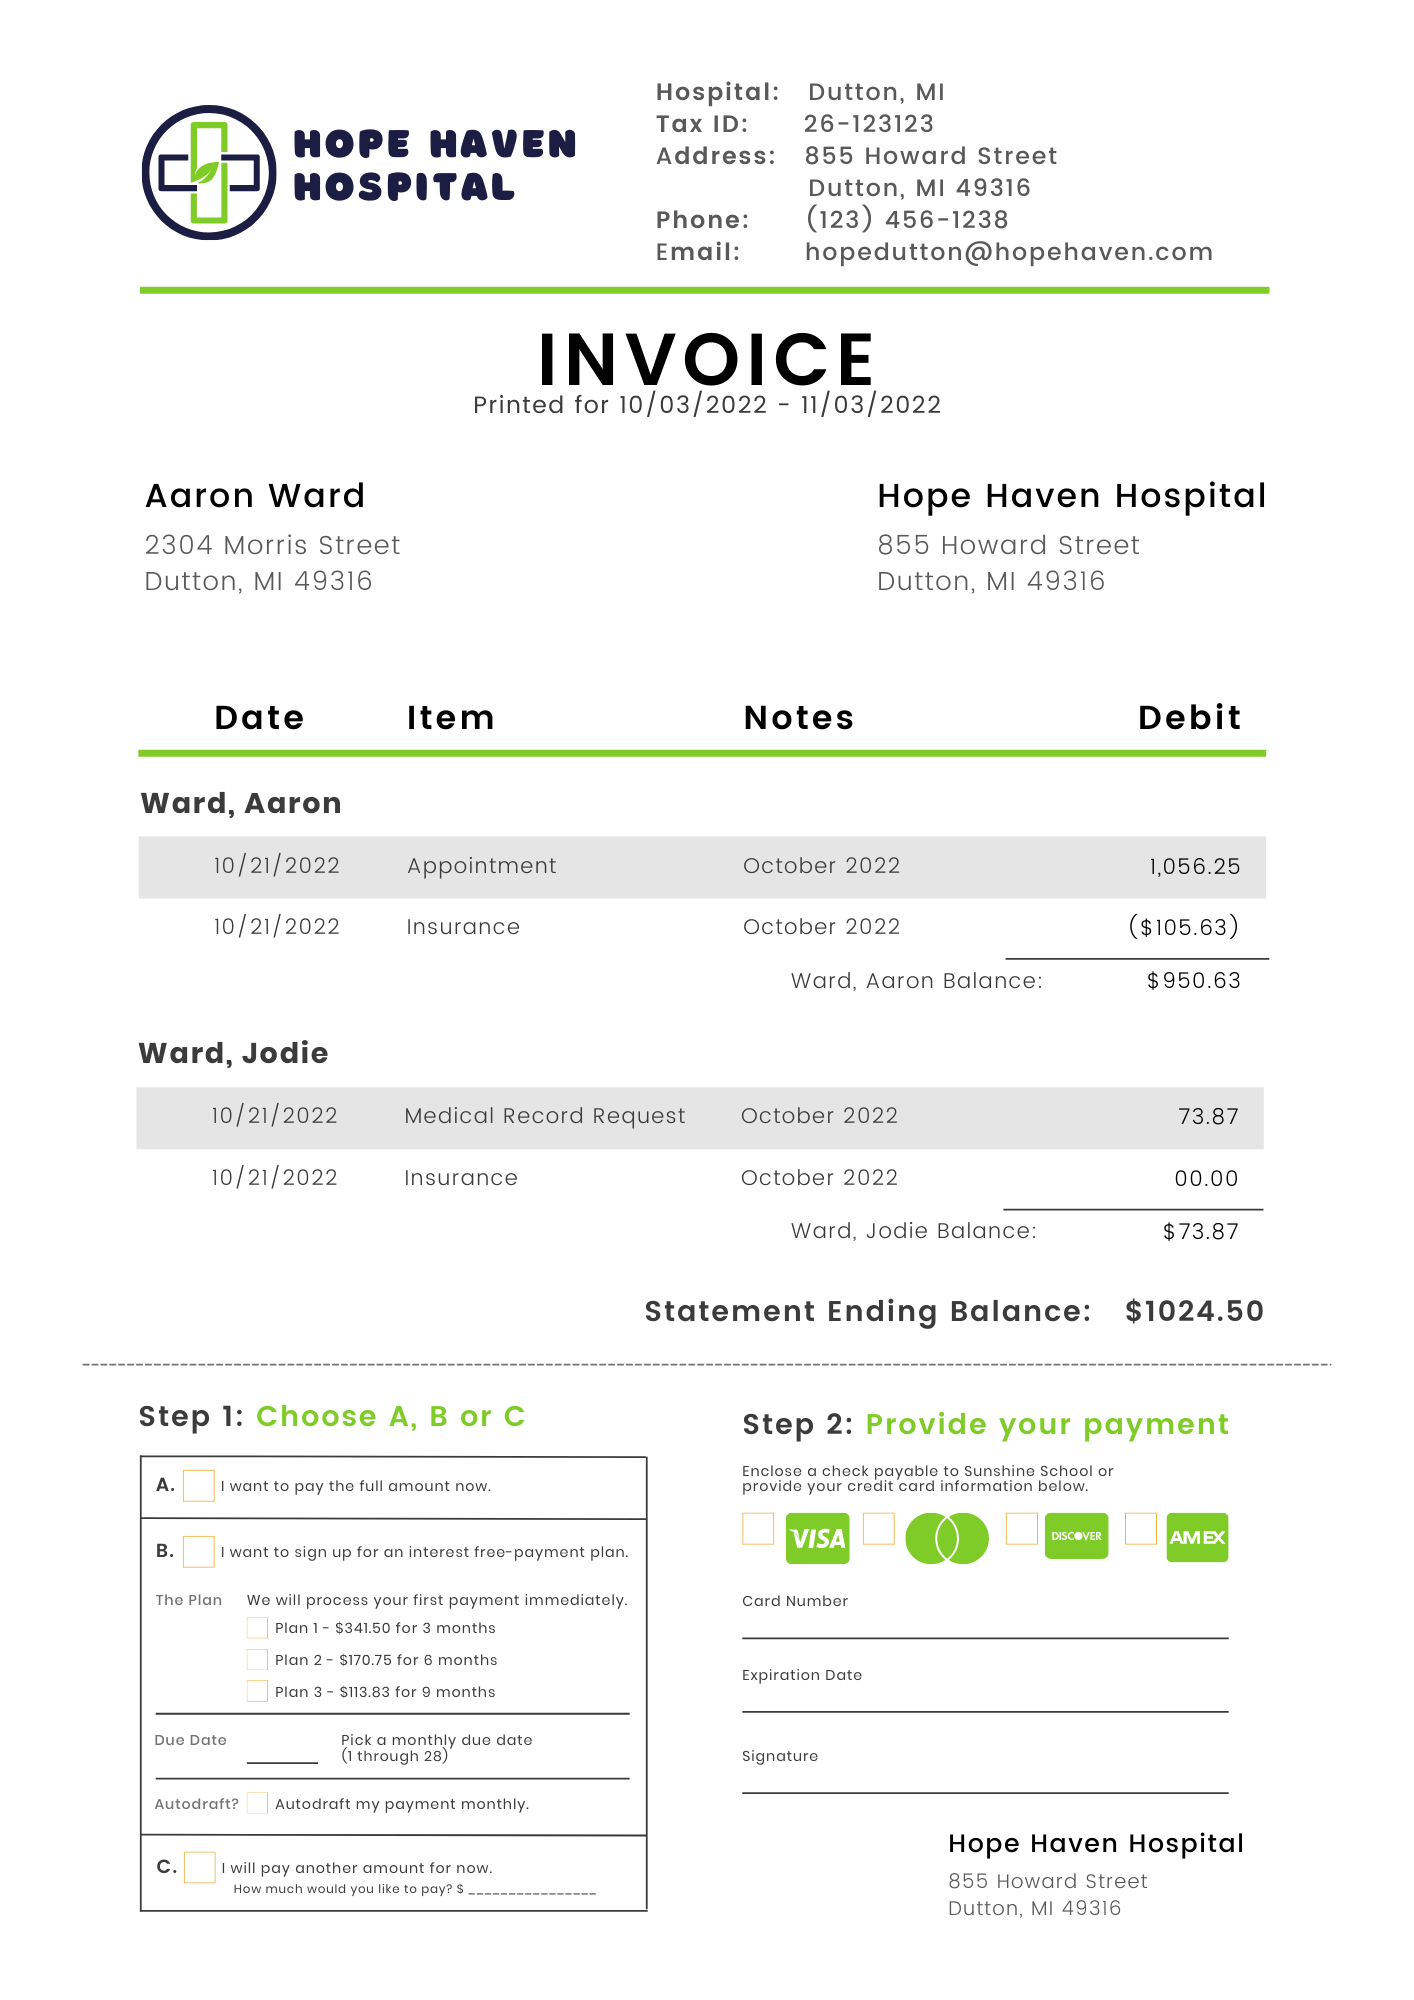

In [3]:
image_example = files('resources/images/Invoice.png')

df = spark.read.format("binaryFile") \
    .load(image_example)

df.show_image("content")

### EasyOCR

In [4]:
pipeline = PipelineModel(stages=[
    DataToImage(inputCol="content", outputCol="image"),
    EasyOcr(inputCol="image", outputCol="text", partitionMap=False, numPartitions=1, device=Device.CPU, batchSize=5, keepFormatting=True),
])

result = pipeline.transform(df).cache()

result.show_text()

### SuryaOCR

In [6]:

pipeline = PipelineModel(stages=[
    DataToImage(inputCol="content", outputCol="image"),
    SuryaOcr(inputCol="image", outputCol="text", partitionMap=True, numPartitions=1, device=Device.CPU, batchSize=5, keepFormatting=True),
])

result = pipeline.transform(df).cache()

result.show_text()

Loaded detection model vikp/surya_det3 on device cpu with dtype torch.float32 1]
Loaded recognition model vikp/surya_rec2 on device cpu with dtype torch.float32
Recognizing Text: 100%|██████████| 15/15 [02:16<00:00,  9.08s/it]   (0 + 1) / 1]
